# Исследование надёжности заёмщиков

Необходимо провести анализ для кредитного отдела банка, выяснить, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

**Описание таблицы исходных данных**:
    
+ children — количество детей в семье
+ days_employed — трудовой стаж в днях
+ dob_days — возраст клиента в годах
+ education — образование клиента
+ education_id — идентификатор образования
+ family_status — семейное положение
+ family_status_id — идентификатор семейного положения
+ gender — пол клиента
+ income_type — тип занятости
+ debt — имел ли задолженность по возврату кредитов
+ total_income — доход в месяц
+ purpose — цель получения кредита

## Шаг 1. Изучение общей информации.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from pymystem3 import Mystem
m = Mystem()

In [2]:
# оцениваем общую структуру данных и сводную информацию о таблице
display(clients_data.head(10)) 
clients_data.info()
clients_data.describe()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


## Вывод

Оценка общей структуры и формата данных показывает, что потребуется произвести первоначальную постобработку данных:
+ Выявить аномальные значения в числовых данных; 
+ Привести строковые данные к одному регистру;
+ Преобразовать объекты `float`  в `int`;
+ обработать пропуски и дубликаты

На основании предварительного анализа, можно сделать вывод, что по разным группам клиентов данные выгружались либо из разных систем, с разным форматом хранения информации, либо были допущены ошибки при выгрузке данных. Об этом говорит, в частности, наличие пустых данных по одинаковому количеству клиентов в разных столбцах (вероятно это одна группа клиентов), а также разные форматы хранения стажа сотрудников (отрицательные, положительные и явно неформатные значения).

## Шаг 2. Предобработка данных

## Обработка пропусков

Сводная информация о данных показывает наличие пропущенных значений в столбцах `days_employed`  и `total_income`. Избавимся от них, заменив нулями:

In [3]:
# проверяем первоначальное количество пустых значений
clients_data.isnull().sum()  

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [4]:
# заменяем пустые значения на 0
clients_data = clients_data.fillna(0) 

In [5]:
# проверяем успешность замены пустых значений
clients_data.isnull().sum() 

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Проверим, являются ли нулевые данные в столбцах `days_employed` и `total_income` пересекающимися. 

In [6]:
# производим выборку строк, одновременно с нулевым стажем И ежемесячным доходом
print(clients_data[(clients_data['days_employed'] == 0) & (clients_data['total_income'] == 0)].count()) 


children            2174
days_employed       2174
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income        2174
purpose             2174
dtype: int64


Видим, что данные пересекаются и клиенты с нулевым  `days_employed` имеют также и нулевой `total_income`.  
Вероятная причина - ошибка выгрузки данных. Т.к. количество их значительно - 2174 шт., что составляет 10 % от общей выборки, то удаление этих данных нецелесообразно, это может значительно повлиять на итоговые выводы по анализу данных. 
Т.к. значения столбца `total_income` критичны для анализа взаимосвязи уровня дохода и возврата кредита в срок, то для этих целей проведем дополнительное исследование и заменим отсутствующие данные по уровню дохода медианными значениями.  

Отсутствующие данные столбца `total_income` будем приводить к медианным значениям для клиентов с аналогичным уровнем образования, т.к. существует зависимость между уровнем образования и доходом.

In [7]:
# Предварительно приведем все значения столбца 'education' к одному регистру
clients_data['education'] = clients_data['education'].str.lower()

In [8]:
# Проверяем
print(clients_data['education'].unique())

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


In [9]:
# Найдем медианные значения дохода для каждого типа образования
data_education_group = clients_data[clients_data['total_income'] > 0].groupby('education')['total_income'].median()
data_education_group

education
высшее                 175340.818855
начальное              117137.352825
неоконченное высшее    160115.398644
среднее                136478.643244
ученая степень         157259.898555
Name: total_income, dtype: float64

In [10]:
total_income_median_0 = data_education_group[0]
total_income_median_1 = data_education_group[1]
total_income_median_2 = data_education_group[2]
total_income_median_3 = data_education_group[3]
total_income_median_4 = data_education_group[4]


In [11]:
# Заменим медианами нулевые значения
def total_income_median(row):
    if row['total_income'] == 0:
        if row['education'] == 'высшее':
            return total_income_median_0
        if row['education'] == 'начальное':
            return total_income_median_1
        if row['education'] == 'неоконченное высшее':
            return total_income_median_2
        if row['education'] == 'среднее':
            return total_income_median_3
        if row['education'] == 'ученая степень':
            return total_income_median_4
    return row['total_income']    

clients_data['total_income'] = clients_data.apply(total_income_median, axis = 1)

In [12]:
# Проверяем
print(clients_data[clients_data['total_income'] == 0]['total_income'].count()) 


0


Далее, избавимся от нулевых значений в столбце `days_employed`. Т.к. данные этого столбца мы не используем в дальнейшем анализе, применим простой метод - значение трудового стажа примем равным разности возраста клиента и 20 лет, приняв за 20 лет средний возраст начала трудовой деятельности и допустив ее беспрерывный характер на протяжении всей жизни клиента.

In [13]:
def fill_days_employed(row):
    if (row['days_employed'] == 0) & (row['dob_years'] >= 20):
        return (row['dob_years'] - 20) * 365
    return row['days_employed']    

clients_data['days_employed'] = clients_data.apply(fill_days_employed, axis = 1)

In [14]:
#Проверяем
clients_data[clients_data['days_employed'] == 0]['days_employed'].count()

16

In [15]:
display(clients_data[clients_data['days_employed'] == 0])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1816,1,0.0,20,среднее,1,женат / замужем,0,M,сотрудник,0,136478.643244,на покупку своего автомобиля
1890,0,0.0,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,175340.818855,жилье
2284,0,0.0,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,136478.643244,недвижимость
4052,0,0.0,19,среднее,1,гражданский брак,1,M,сотрудник,0,136478.643244,на проведение свадьбы
4064,1,0.0,0,среднее,1,гражданский брак,1,M,компаньон,0,136478.643244,ремонт жилью
5014,0,0.0,0,среднее,1,женат / замужем,0,F,компаньон,0,136478.643244,покупка недвижимости
6411,0,0.0,0,высшее,0,гражданский брак,1,F,пенсионер,0,175340.818855,свадьба
6670,0,0.0,0,высшее,0,в разводе,3,F,пенсионер,0,175340.818855,покупка жилой недвижимости
8574,0,0.0,0,среднее,1,женат / замужем,0,F,сотрудник,0,136478.643244,недвижимость
10446,1,0.0,20,среднее,1,гражданский брак,1,F,сотрудник,0,136478.643244,на покупку подержанного автомобиля


Видим, что из оставшихся клиентов, 6 имеют возраст  19-20 лет,  поэтому вполне вероятно, что их реальный трудовой стаж равен нулю. Оставим эти данные в таком виде.
Остальных клиентов, т.к. их количество незначительно, относительно объема выборки, удалим.

In [16]:
clients_data.drop(clients_data[(clients_data['days_employed'] == 0) & (clients_data['dob_years'] == 0)].index, inplace=True)

In [17]:
#Проверяем
clients_data[clients_data['days_employed'] == 0]['days_employed'].count()

6

## Вывод

Было выявлено 2174 пропущенных значения, произведена их замена на нулевые значения. Установлено, что отсутствующие значения принадлежат одной группе клиентов, с вероятной ошибкой неполной выгрузки данных.  
Далее, для ежемесячного дохода заменили нулевые значения на медианные значения для клиентов, имеющих аналогичный уровень образования. Нулевые значения стажа заполнили расчетными значениями, исходя из возраста клиента. 

## Обработка артефактов

Проверим все столбцы с данными на наличие артефактов - значений, которые не отражают суть информации, содержащейся в столбце

### Обработка столбца `children`

In [18]:
# Проверяем количество уникальных значений столбца 'children', воспользуемся методом value_counts()
clients_data['children'].value_counts()

 0     14141
 1      4817
 2      2055
 3       329
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Значения -1 и 20 явно некорректны. Т.к. общее количество их незначительно (47 и 76 соответственно), относительно объема выборки, удаляем строки, содержащие данные значения:

In [19]:
# удаляем
clients_data.drop(clients_data[(clients_data['children'] == -1) | (clients_data['children'] == 20)].index, inplace=True)


In [20]:
# проверяем
clients_data['children'].value_counts()

0    14141
1     4817
2     2055
3      329
4       41
5        9
Name: children, dtype: int64

### Обработка столбца `dob_years`

In [21]:
# Проверяем количество уникальных значений столбца 'dob_years'
clients_data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

In [22]:
# Определим количество клиентов с нулевым значением 'dob_years'
clients_data[clients_data['dob_years'] == 0]['dob_years'].count()

90

In [23]:
# В разрезе типов клиентов
clients_data[clients_data['dob_years'] == 0]['income_type'].value_counts()

сотрудник      49
компаньон      18
пенсионер      17
госслужащий     6
Name: income_type, dtype: int64

In [24]:
# Восстановим отсутствующий возраст клиентов - пенсионеров. Примем для лиц мужского пола возраст 60 лет, для женского - 55.
clients_data.loc[(clients_data['gender'] == 'F') & (clients_data['dob_years'] == 0) & (clients_data['income_type'] == 'пенсионер'), 'dob_years'] = 55
clients_data.loc[(clients_data['gender'] == 'M') & (clients_data['dob_years'] == 0) & (clients_data['income_type'] == 'пенсионер'), 'dob_years'] = 60


In [25]:
# Проверяем
clients_data[clients_data['dob_years'] == 0]['income_type'].value_counts()

сотрудник      49
компаньон      18
госслужащий     6
Name: income_type, dtype: int64

Для оставшихся клиентов нет однозначного критерия позволяющего с большой долей вероятности установить их возраст. Т.к. их количество незначительно, относительно объема выборки, удаляем их.


In [26]:
clients_data.drop(clients_data[clients_data['dob_years'] == 0].index, inplace=True)

In [27]:
# Проверяем
clients_data[clients_data['dob_years'] == 0]['dob_years'].count()

0

### Обработка столбца `days_employed`

Предварительный анализ данных, содержащихся в столбце `day_employed` показывает наличие как положительных , так и отрицательных значений. Вероятная причина - ошибка выгрузки данных, либо выгрузка из разных систем, с разным форматом хранения данных. Далее , приведем все значения к одному знаку. Кроме того, существуют значения, явно превышающие максимально возможный трудовой стаж. Например, значение 340266.072047, эквивалентное 932 годам, что явно является ошибкой. Проведем анализ причин возникновения подобных значений

In [28]:
# Проверяем количество отрицательных значений в столбце 'day_employed'
clients_data[clients_data['days_employed'] < 0]['days_employed'].count()

15736

In [29]:
# Приводим отрицательные значения к положительным, используя метод apply и функцию abs
clients_data['days_employed'] = clients_data['days_employed'].apply(abs)

In [30]:
# Проверяем  
clients_data[clients_data['days_employed'] < 0]['days_employed'].count()

0

In [31]:
# Определим количество строк с трудовым стажем более 60 лет (18250 дней), как предположительно максимально возможный теоретический стаж
clients_data[clients_data['days_employed'] > 21900]['days_employed'].count()

3431

In [32]:
# Определим, какие категории клиентов имеют подобный стаж
clients_data[clients_data['days_employed'] > 21900]['income_type'].value_counts()

пенсионер      3429
безработный       2
Name: income_type, dtype: int64

Видим, что подавляющее большинство таких клиентов - это пенсионеры. 
Вероятная причины ошибки - некорректная выгрузка. 
Т.к. количество их значительно, около 15 % общей выборки, то удаление этих данных нецелесообразно. Учитывая, что данные клиенты - пенсионеры, примем для этой группы стаж равный 40 годам или 14600 дней.  


In [33]:
clients_data.loc[(clients_data['income_type'] == 'пенсионер') & (clients_data['days_employed'] > 21900), 'days_employed'] = 14600

In [34]:
# Проверяем
clients_data[clients_data['days_employed'] > 21900]['income_type'].value_counts()

безработный    2
Name: income_type, dtype: int64

In [35]:
#Оставшихся 2 клиентов можно удалить
clients_data.drop(clients_data[(clients_data['income_type'] == 'безработный') & (clients_data['days_employed'] > 21900)].index, inplace=True)


In [36]:
# Проверяем
clients_data[clients_data['days_employed'] > 21900]['income_type'].value_counts()

Series([], Name: income_type, dtype: int64)

### Обработка прочих столбцов

Проверим все прочие столбцы на наличие аномальных данных.  

In [37]:
print('education_id', clients_data['education_id'].unique())
print('family_status', clients_data['family_status'].unique())
print('family_status_id', clients_data['family_status_id'].unique())
print('gender', clients_data['gender'].unique())
print('income_type', clients_data['income_type'].unique())
print('debt', clients_data['debt'].unique())
print('total_income', clients_data['total_income'].unique())
print('purpose', clients_data['purpose'].unique())


education_id [0 1 2 3 4]
family_status ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
family_status_id [0 1 2 3 4]
gender ['F' 'M' 'XNA']
income_type ['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'предприниматель'
 'студент' 'в декрете']
debt [0 1]
total_income [253875.6394526  112080.01410244 145885.95229686 ...  89672.56115303
 244093.05050043  82047.41889948]
purpose ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'

Видим, что аномальные значения остались толкьо в столбце `gender`

In [38]:
# Определим количество аномальных данных в столбце 'gender'
clients_data[clients_data['gender'] == 'XNA']['gender'].count()

1

In [39]:
# Т.к. такой клиент всего один, удаляем его из выборки
clients_data.drop(clients_data[clients_data['gender'] == 'XNA'].index, inplace=True)

In [40]:
# Проверяем
clients_data[clients_data['gender'] == 'XNA']['gender'].count()

0

## Вывод

Были обработаны все аномальные данные, приведены к стандартному виду или удалены

## Замена типа данных

Заменим тип данных столбцов `days_employed` и `total_income` на `int64`, с помощью метода `astype`
 

In [41]:
clients_data['days_employed'] = clients_data['days_employed'].astype('int64')
clients_data['total_income'] = clients_data['total_income'].astype('int64')

In [42]:
# Проверяем результат
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21316 entries, 0 to 21524
Data columns (total 12 columns):
children            21316 non-null int64
days_employed       21316 non-null int64
dob_years           21316 non-null int64
education           21316 non-null object
education_id        21316 non-null int64
family_status       21316 non-null object
family_status_id    21316 non-null int64
gender              21316 non-null object
income_type         21316 non-null object
debt                21316 non-null int64
total_income        21316 non-null int64
purpose             21316 non-null object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


## Вывод

Произведена замена типа данных по столбцам, на целочисленный. Выбор метода обусловлен заменой одного числового типа на другой.

## Обработка дубликатов

In [43]:
# Определим количество дубликатов методом duplicated()
clients_data.duplicated().sum()

71

In [44]:
# Удаляем дубликаты, обновляем индексы
clients_data = clients_data.drop_duplicates().reset_index(drop = True)

In [45]:
# Проверяем
clients_data.duplicated().sum()

0

## Вывод

Для поиска и удаления дубликатов использовали предназначенные для этого методы `duplicated()` и `drop_duplicates()` соответственно. Вероятная причина дубликатов - статистическое совпадение, т.к. все дубликаты сосредоточены в группе клиентов с нулевыми столбцами days_employed и total_income.  

## Лемматизация

In [46]:
# Создадим функцию лемматизации, передадим ей каждую строку столбца 'purpose', используя метод apply()

def lemma(string):
    lemma = m.lemmatize(string)
    return lemma


clients_data['purpose_lemma'] = clients_data['purpose'].apply(lemma)

display(clients_data.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemma
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]"
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]"
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]"
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]"
4,0,14600,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]"
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,"[покупка, , жилье, \n]"
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,"[операция, , с, , жилье, \n]"
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,"[образование, \n]"
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,"[на, , проведение, , свадьба, \n]"
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,"[покупка, , жилье, , для, , семья, \n]"


## Вывод

Произведена лемматизация целей кредита. Лемматизация производилась с использованием библиотеки pymystem3. Была создана функция lemma(), в качестве параметра которой передается каждая строка столбца 'purpose'. Для перебора этих значений использовался метод apply(), которому в свою очередь в качестве аргумента передавалась созданная функция. Лематизированные значения сохранены в отдельный столбец, для последующей обработки.  
По результатам лемматизации выделим следующие основные цели кредита:
    + Недвижимость
    + Автомобиль
    + Образование
    + Свадьба
На основании этих основных целей, проведем дальнейшую категоризацию клиентов.

## Категоризация данных

### Категоризация по целям кредита

In [47]:
# Категоризуем столбец по лемматизированным целям кредита

def categorize(string):
    if 'недвижимость' in string or 'жилье' in string:
        return 'недвижимость'
    if 'автомобиль' in string:
        return 'автомобиль'
    if 'образование' in string:
        return 'образование'
    if 'свадьба' in string:
        return 'свадьба'

clients_data['purpose_lemma'] = clients_data['purpose_lemma'].apply(categorize)
clients_data.head(5)

    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemma
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,14600,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


In [48]:
# Сведем категории в сводную таблицу, определим количество просрочек по каждой цели кредита
data_purpose_pivot = clients_data.pivot_table(index = 'purpose_lemma', columns = 'debt', values = 'purpose', aggfunc = 'count')
# Определим % клиентов с просрочкой по каждой категории цели кредита
data_purpose_pivot['%'] = data_purpose_pivot[1] * 100 / data_purpose_pivot[0]

print(data_purpose_pivot)

debt              0    1          %
purpose_lemma                      
автомобиль     3863  398  10.302873
недвижимость   9933  776   7.812343
образование    3607  369  10.230108
свадьба        2118  181   8.545798


Text(0, 0.5, 'Просрочка')

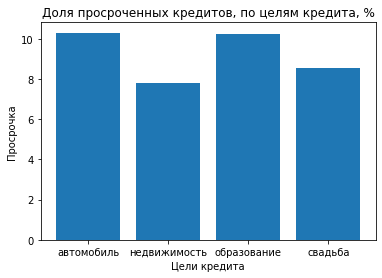

In [49]:
# Построим график зависимости доли просроченных кредитов в зависимости от цели кредита

axis_x = (data_purpose_pivot.index.get_level_values(0).tolist())
axis_y = data_purpose_pivot['%'].tolist()

plt.bar(axis_x, axis_y)
plt.title("Доля просроченных кредитов, по целям кредита, %")
plt.xlabel("Цели кредита")
plt.ylabel("Просрочка")


### Категоризация по величине ежемесячного дохода

Выделим категории дохода, используя разбиение на  4 квантиля.
Составим из категорий отдельный столбец 'total_income_category'.

In [50]:
clients_data['total_income_category'] = pd.qcut(clients_data['total_income'], 4)


In [51]:
clients_data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemma,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,"(195799.0, 2265604.0]"
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,"(107499.0, 141139.0]"
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,"(141139.0, 195799.0]"
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,"(195799.0, 2265604.0]"
4,0,14600,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,"(141139.0, 195799.0]"


In [52]:
# Сведем категории в сводную таблицу, определим количество просрочек по каждой группе дохода
data_income_pivot = clients_data.pivot_table(index = 'total_income_category', columns = 'debt', values = 'purpose', aggfunc = 'count')
# Определим % клиентов с просрочкой по каждой категории 
data_income_pivot['%'] = data_income_pivot[1] * 100 / data_income_pivot[0]

print(data_income_pivot)

debt                      0    1         %
total_income_category                     
(20666.999, 107499.0]  4888  424  8.674304
(107499.0, 141139.0]   4843  468  9.663432
(141139.0, 195799.0]   4859  452  9.302326
(195799.0, 2265604.0]  4931  380  7.706348


Text(0, 0.5, 'Квантиль дохода')

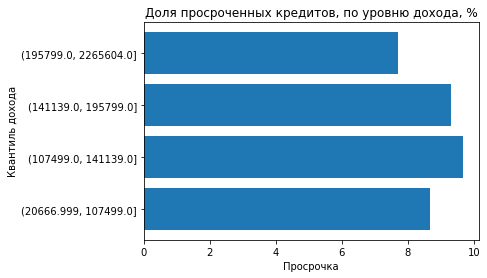

In [53]:
# Построим график зависимости доли просроченных кредитов в зависимости от уровня дохода

axis_x = []
for quantil in data_income_pivot.index:
    axis_x.append(str(quantil))

axis_y = data_income_pivot['%'].tolist()

plt.barh(axis_x, axis_y)
plt.title("Доля просроченных кредитов, по уровню дохода, %")
plt.xlabel("Просрочка")
plt.ylabel("Квантиль дохода")

Определим "словари", имеющиеся в наших данных.
В качестве словарей могут выступать столбцы 'education' и 'family_status', со своими идентификаторами:


In [54]:
dict_education = clients_data.loc[:, ['education', 'education_id']].drop_duplicates().reset_index(drop = True)
dict_family_status = clients_data.loc[:, ['family_status', 'family_status_id']].drop_duplicates().reset_index(drop = True)

print(dict_education)
print('\n', dict_family_status)

             education  education_id
0               высшее             0
1              среднее             1
2  неоконченное высшее             2
3            начальное             3
4       ученая степень             4

            family_status  family_status_id
0        женат / замужем                 0
1       гражданский брак                 1
2         вдовец / вдова                 2
3              в разводе                 3
4  Не женат / не замужем                 4


Аналогично, создадим словарь для укрупненной цели кредита

In [55]:
dict_purpose_lemma = clients_data.loc[:, 'purpose_lemma'].drop_duplicates().reset_index(drop = True).to_frame()
dict_purpose_lemma['purpose_lemma_id'] = [1, 2, 3, 4]
print(dict_purpose_lemma)

  purpose_lemma  purpose_lemma_id
0  недвижимость                 1
1    автомобиль                 2
2   образование                 3
3       свадьба                 4


## Вывод

Произведена категоризация данных по целям кредита и величине ежемесячного дохода.  
Установлены зависимости наличия просроченной задолженность от целей кредита.
Анализ показывает, что кредит на недвижимость и кредитование клиентов с наименишим доходом показывает минимальный уровень невозвратов в срок.

### Исследование зависимости наличия просроченного кредита от количества детей

In [56]:
# Оценим зависимость количества детей от наличия просроченной задолженнсти
data_children_pivot = clients_data.pivot_table(index = 'children', columns = 'debt', values = 'purpose', aggfunc = 'count')
data_children_pivot['%'] = data_children_pivot[1] * 100 / data_children_pivot[0]
print(data_children_pivot)

debt            0       1          %
children                            
0         12978.0  1059.0   8.159963
1          4351.0   440.0  10.112618
2          1845.0   194.0  10.514905
3           301.0    27.0   8.970100
4            37.0     4.0  10.810811
5             9.0     NaN        NaN


Text(0, 0.5, 'Просрочка')

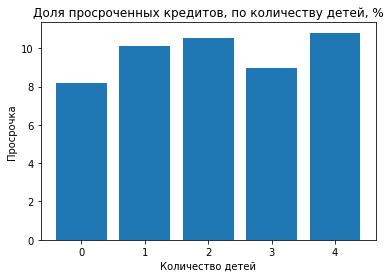

In [57]:
# Построим график зависимости доли просроченных кредитов в зависимости от количества детей

axis_x = (data_children_pivot.index.get_level_values(0).tolist())
axis_y = data_children_pivot['%'].tolist()

plt.bar(axis_x, axis_y)
plt.title("Доля просроченных кредитов, по количеству детей, %")
plt.xlabel("Количество детей")
plt.ylabel("Просрочка")

### Исследование зависимости между семейным положением и возвратом кредита в срок 

In [58]:
# Оценим зависимость семейного положения и наличия просроченной задолженнсти
data_family_pivot = clients_data.pivot_table(index = 'family_status', columns = 'debt', values = 'purpose', aggfunc = 'count')
data_family_pivot['%'] = data_family_pivot[1] * 100 / data_family_pivot[0]
print(data_family_pivot)

debt                       0    1          %
family_status                               
Не женат / не замужем   2512  272  10.828025
в разводе               1096   84   7.664234
вдовец / вдова           887   63   7.102593
гражданский брак        3728  383  10.273605
женат / замужем        11298  922   8.160736


Text(0, 0.5, 'Семейное положение')

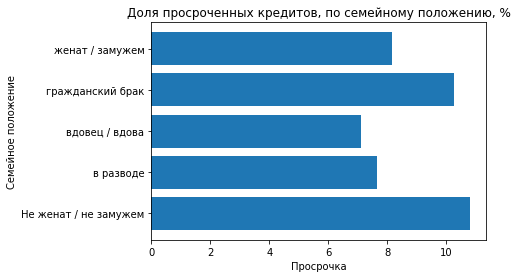

In [59]:
# Построим график зависимости доли просроченных кредитов от семейного положения

axis_x = (data_family_pivot.index.get_level_values(0).tolist())
axis_y = data_family_pivot['%'].tolist()

plt.barh(axis_x, axis_y)
plt.title("Доля просроченных кредитов, по семейному положению, %")
plt.xlabel("Просрочка")
plt.ylabel("Семейное положение")

## Шаг 3. Ответьте на вопросы

+ Есть ли зависимость между наличием детей и возвратом кредита в срок?

## Вывод

Присутствует зависимость между наличием детей и возвратом кредита в срок. Клиенты имеющие детей чаще допускают просрочку кредита. Это обусловлено тем, что, наличие детей - одна из существенных статей расхода семейного бюджета. Приоритет этой статьи выше приоритета "погашение кредита", поэтому выбирая , на что потратить денежные средства, в случае их недостатка, сравнение не в пользу кредита. В результате , возможно появление просрочки погашения.  

+ Есть ли зависимость между семейным положением и возвратом кредита в срок?

## Вывод

Присутствует зависимость между семейным положением и возвратом кредита в срок.  
Клиенты не женатые и не состоящие в официальном браке, минимум на 2% чаще допускают просрочку по погашению кредита, по сравнению с клиентами, состоящими, либо состоявшими ранее  в официальном браке. Вероятная причина - наличие семьи заставляет более ответственно подходить к финансовому планированию бюджета.

+ Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

## Вывод

Существует зависимость между уровнем дохода и возвратом кредита в срок. Клиенты с меньшим уровнем дохода чаще допускают невозврат кредита в срок.  
Более того, наблюдается интересная особенность - клиенты с самым минимальным доходом оказываются более дисциплинированными в погашении кредита, чем чуть более состоятельные заемщики. Обеспеченные же группы заемщиков - самые добросовестные плательщики.

+ Как разные цели кредита влияют на его возврат в срок?

## Вывод

Существует определенная зависимость между целями кредита и возврата его в срок. Кредиты, взятые для целей образования и на покупку автомобиля, примерно в 10 % случаев не будут возвращены в срок (будут иметь прсрочку).   
Кредиты , взятые на проведение свадебной церемонии, допускают просрочку в 8,5 % случаев.   
И наиболее добросовестно возвращаемые кредиты, это кредиты на недвижимость, просрочка по которым случается в 7,8 % случаев.  
Вероятная причина такой картины - в важности причины займа. Недвижимость обеспечивает одну из главных базовых потребностей, поэтому к выплате кредита по ней относятся более ответственно.

## Шаг 4. Общий вывод

В процессе выполнения проекта были отработаны задачи по подготовке предваритаельных данных, очистке артефактов, пустых значений, заполнению отсутствующих значений, необходимых для дальнейшего анализа.  
Проведена лемматизация и категоризация данных.  
Выявлены зависимости между разными данными.

На основании проведенного анализа можно разработать  следующие рекомендации для кредитного подразделения банка, учитывая их в скоринговой системе:
    1. Наиболее безрисковым продуктом с позиции возврата средств, для банка является кредит на недвижимость, выданный заемщику, состоящему в зарегистрированных отношениях, не имеющему детей, и обладающему доходом по первому квантилюраспределения.  
    Эта группа клиентов, с одной стороны не обременена детьми, являющимися значительной статьей расходов, но тем не менее обладающими какой-то степенью ответственности за официальную семью.
    Неожиданным оказался результат, что клиенты с низким уровнем дохода оказываются более финансово ответственными, по сравнению с более обеспеченными заемщиками. Это говорит о финансовой дисциплине и умении распоряжаться ограниченным бюджетом.
    2. Вторым продуктом, с сопоставимым уровнем просрочки является кредит на свадьбу. Это объясняется тем, что целевые клиентские группы по данным видам кредитов значительно пересекаются. Если в первом случае, это молодые семьи, то во втором, люди, готовые официально оформить свои отношения, что делает довольно близкими по потребительскому и финансовому положению. В результате имеем близкую долю невозврата, 7.8 и 8.5 % соответственно.
    3. Кредиты на образование и автомобиль показывают практически идентичные проценты просрочки, т.к. данные кредиты не относятся к удовлетворению базовых потребностей человека, соответственно, показывают схожее отношение потребителей к их возврату.

Вышеизложенные рекомендации, могут учитываться не только скоринговой системой на этапе оценки потенциального заемщика, но и для разработки дифференцированной системы расчета процентных ставок, в зависимости от цели кредитования. Так, например, проведенный анализ подтверждает целесообразность выделения различных направлений потребительского кредитования: авто, образование, недвижимость, свадьба, отпуск, ремонт и т.д.
    
    
    